In [1]:
from ANEMO import ANEMO
from ANEMO import read_edf

import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Retrieving the data

In [2]:
datafile = 'data/enregistrement_AM_2017-10-23_100057.asc'

try:
    data = read_edf(datafile, 'TRIALID')
except:
    from urllib.request import urlopen
    url = 'https://github.com/chloepasturel/AnticipatorySPEM/raw/master/data/enregistrement_AM_2017-10-23_100057.asc'
    
    with open(datafile, 'wb') as f:
        f.write(urlopen(url).read())
    urlopen(url).close()
    f.close()
    data = read_edf(datafile, 'TRIALID')
    


expfile = 'data/enregistrement_AM_2017-10-23_100057.pkl'

try :
    with open(expfile, 'rb') as fichier :
        exp = pickle.load(fichier, encoding='latin1')
except :
    from urllib.request import urlopen
    url = 'https://github.com/chloepasturel/AnticipatorySPEM/raw/master/data/enregistrement_AM_2017-10-23_100057.pkl'
    
    with open(expfile, 'wb') as f:
        f.write(urlopen(url).read())
    urlopen(url).close()
    f.close()
    with open(expfile, 'rb') as fichier :
        exp = pickle.load(fichier, encoding='latin1')

# Demo

In [3]:
Plot = ANEMO.Plot(exp)
Fit = ANEMO.Fit(exp)

In [4]:
# number of the trial and block that you want to display with plot_data and plot_fit
trial=11
block=1

# for plot_Full_data and Fit_full
# display the first ten trials divided into two blocks of 5 trials each
data1 = data[:10]
N_blocks = 2
N_trials = 5

In [5]:
def demo(data_show, equation):
    fig, axs = Plot.plot_equation(equation=equation)
    plt.show()
    fig, axs = Plot.plot_data(data=data, show=data_show, trials=trial, block=block, show_target=True)
    plt.show()
    fig, axs = Plot.plot_fit(data=data, equation=equation, trials=trial, block=block)
    plt.show()
    
    print('Filtre sur la position :')
    fig, axs = Plot.plot_fit(data=data, equation=equation, trials=trial, block=block,
                            filt='position', cutoff=30, sample_rate=1000)
    plt.show()
    
    if data_show=='velocity' :
        print('Filtre sur la vitesse :')
        fig, axs = Plot.plot_fit(data=data, equation=equation, trials=trial, block=block,
                                filt='velocity', cutoff=30, sample_rate=1000)
        plt.show()

        print('Filtre sur la position et la vitesse :')
        fig, axs = Plot.plot_fit(data=data, equation=equation, trials=trial, block=block,
                                filt='velocity-position', cutoff=30, sample_rate=1000)
        plt.show()

    
    print('\nPlot Full Data\n---------------\n')
    Plot.plot_Full_data(data=data1, show=data_show, N_blocks=N_blocks, N_trials=N_trials,
                    file_fig='result/%s'%data_show)
    print('\nfigure data saved in result/%s\n------------------------------\n'%data_show)
    
    
    print('\nPlot Full Fit\n---------------\n')
    param = Fit.Fit_full(data=data1, equation=equation, plot=True,
                         N_blocks=N_blocks, N_trials=N_trials, file_fig='result/Fit_%s'%equation)
    
    '''
    # pour fitter sur des donnée Filtrée
    param = Fit.Fit_full(data=data1, equation=equation, plot=True,
                         N_blocks=N_blocks, N_trials=N_trials, file_fig='result/Fit_filtre_%s'%equation,
                         filt='velocity-position', cutoff=30, sample_rate=1000)
    '''
    
    print('\nfigure fit saved in result/Fit_%s'%equation)

    # saves the fit parameters
    with open('result/param_Fit_AM_%s.pkl'%equation, 'wb') as fichier:
        f = pickle.Pickler(fichier)
        f.dump(param)
    print('param fit saved in result/param_Fit_%s_AM\n------------------------------\n'%equation)

## Demo velocity

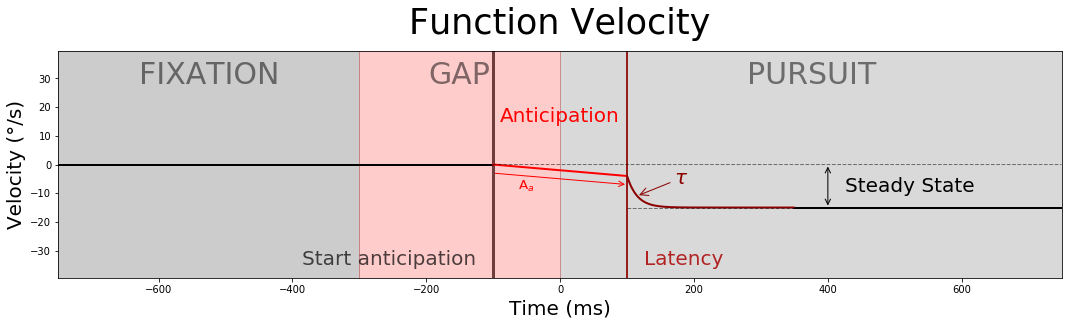

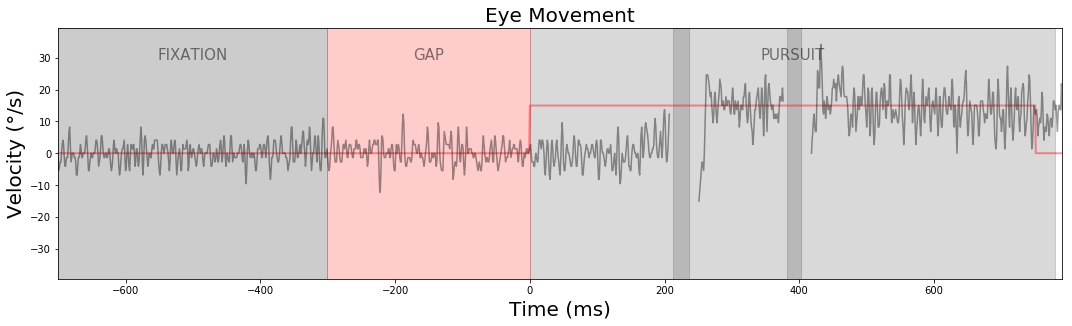

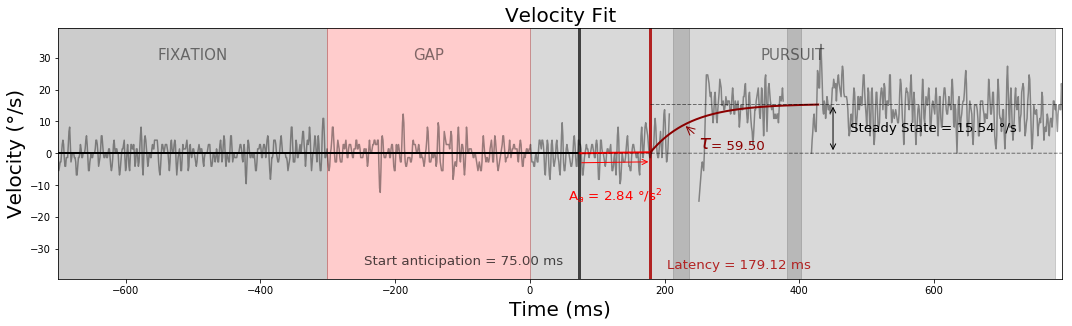

Filtre sur la position :


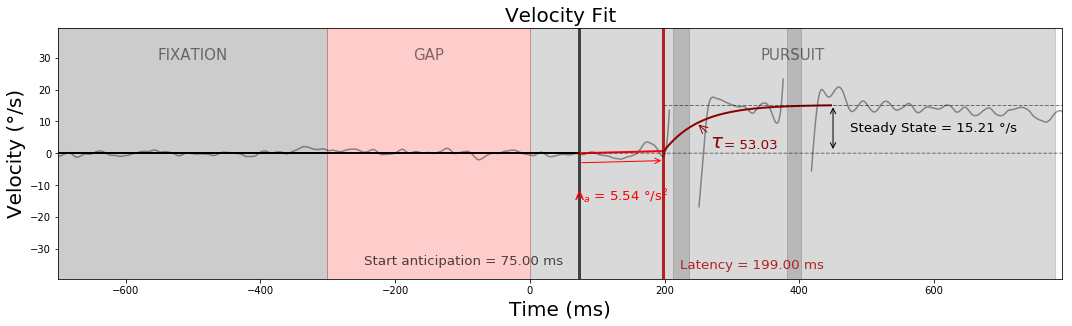

Filtre sur la vitesse :


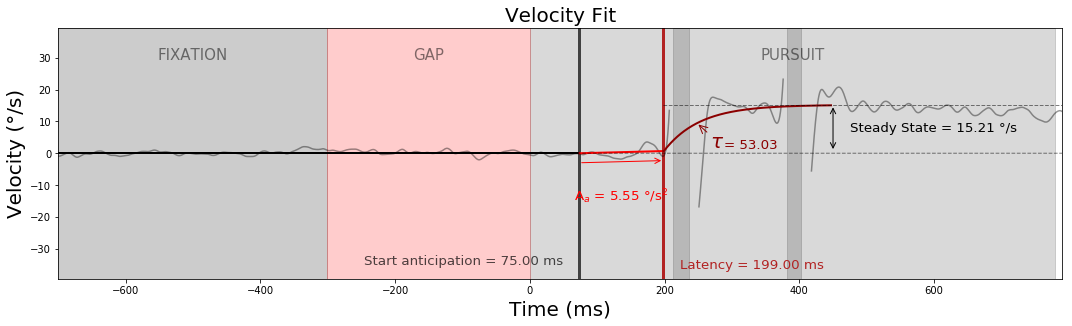

Filtre sur la position et la vitesse :


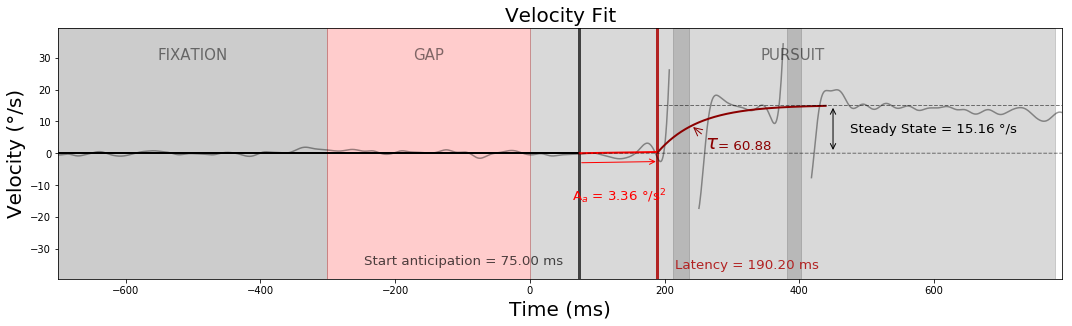


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/velocity
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_fct_velocity
param fit saved in result/param_Fit_fct_velocity_AM
------------------------------



In [6]:
demo('velocity', 'fct_velocity')

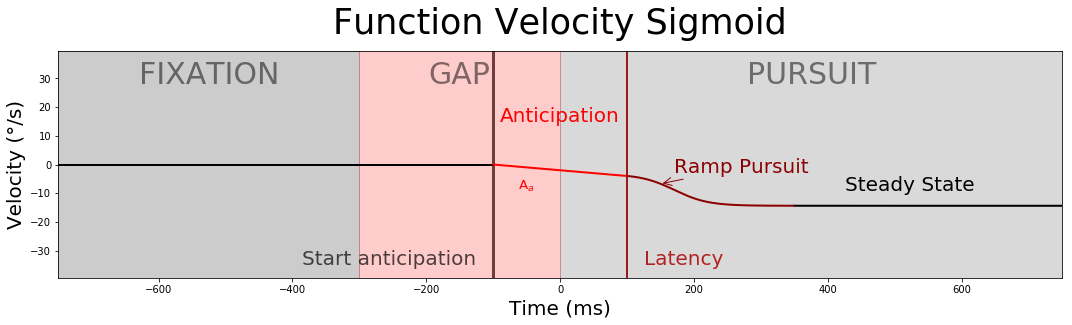

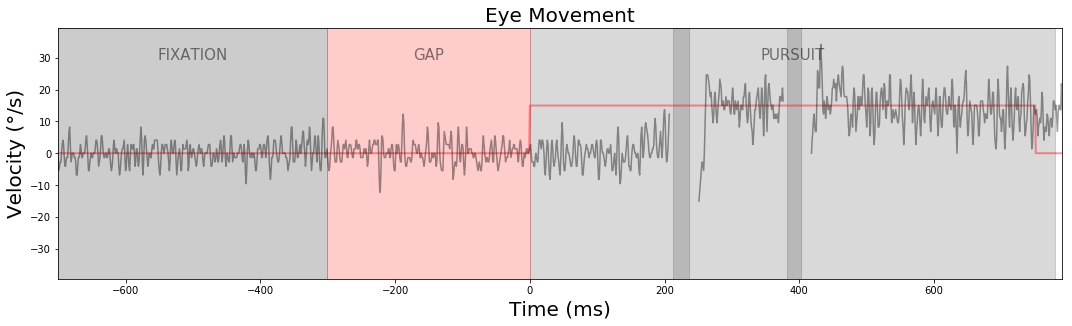

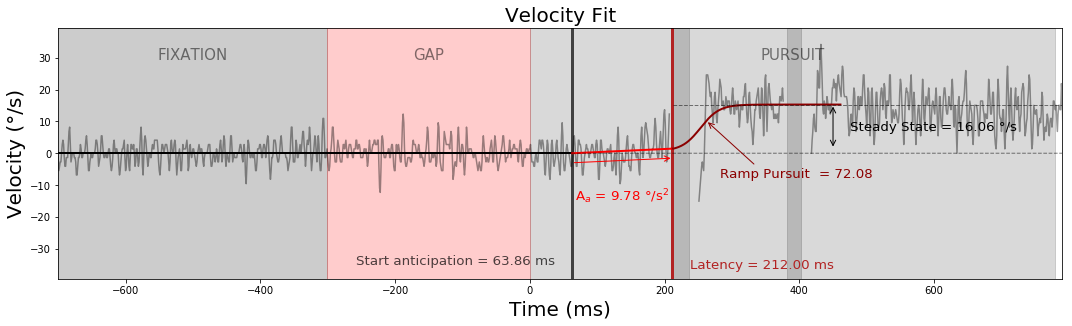

Filtre sur la position :


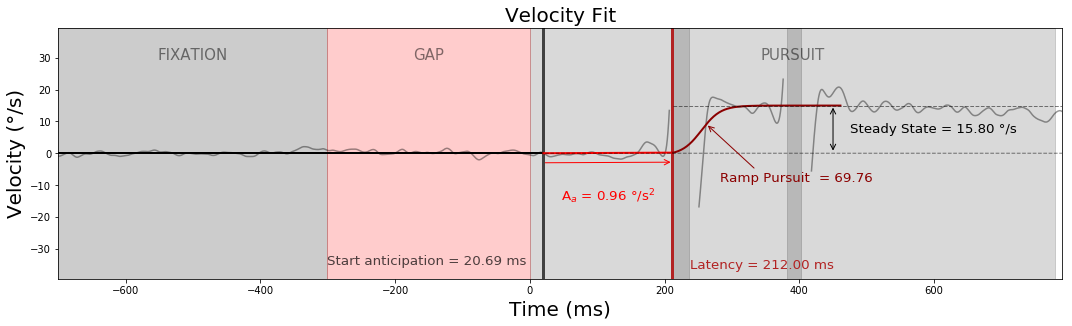

Filtre sur la vitesse :


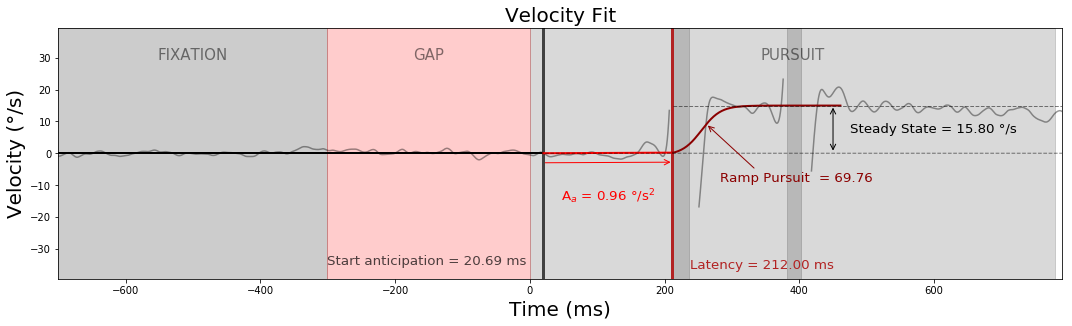

Filtre sur la position et la vitesse :


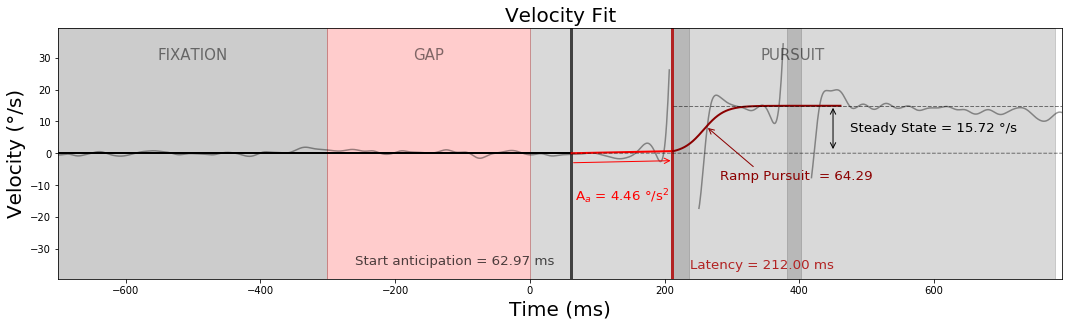


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/velocity
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_fct_velocity_sigmo
param fit saved in result/param_Fit_fct_velocity_sigmo_AM
------------------------------



In [7]:
demo('velocity', 'fct_velocity_sigmo')

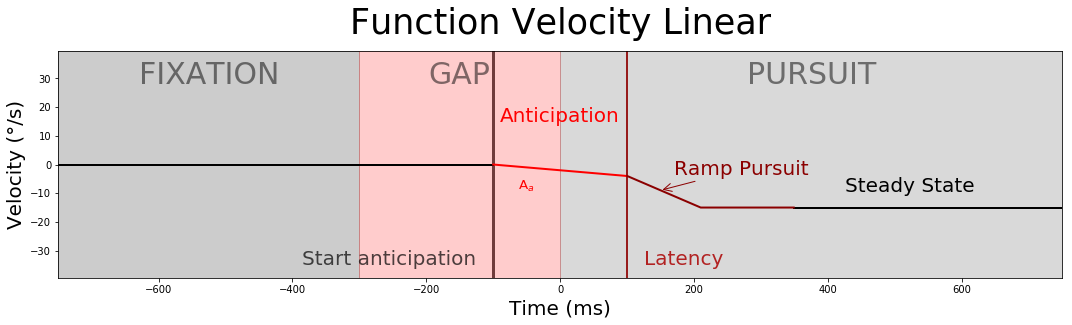

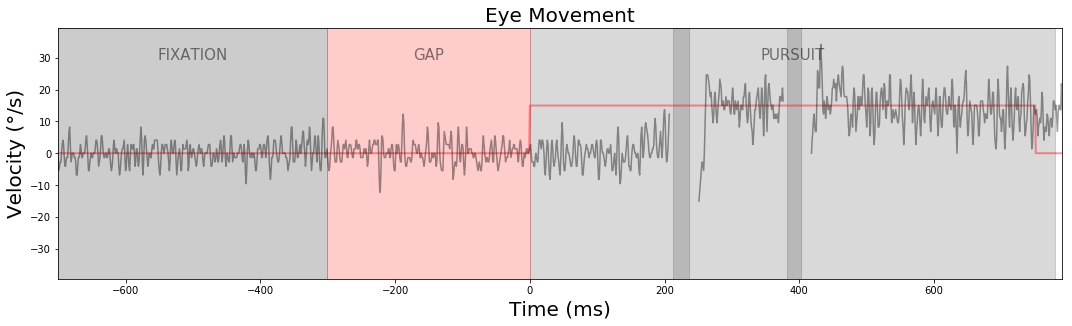

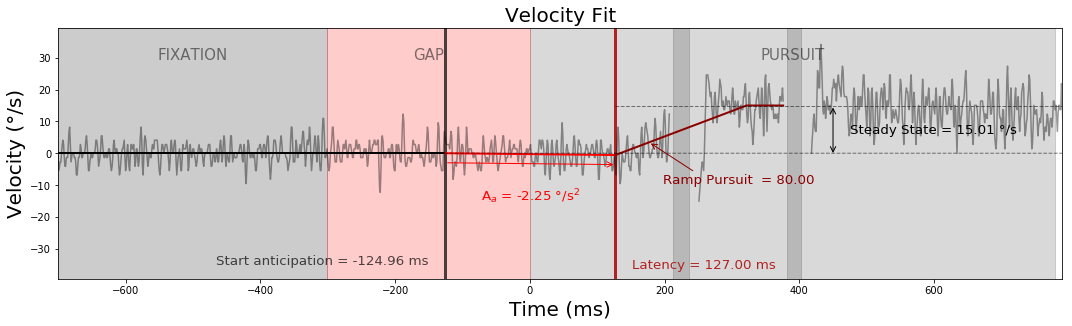

Filtre sur la position :


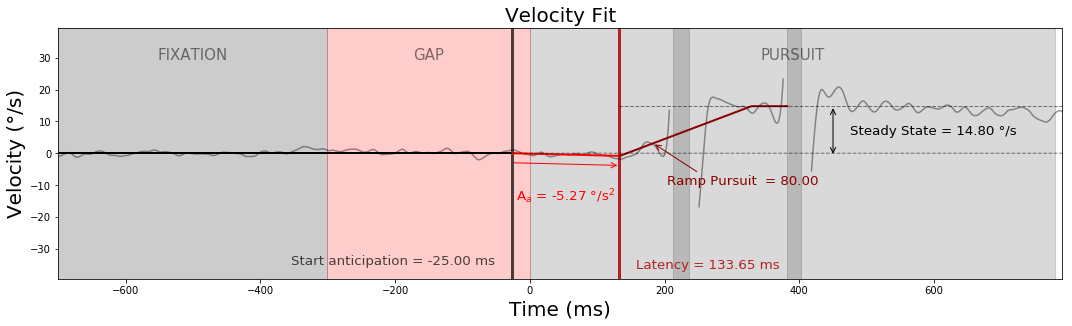

Filtre sur la vitesse :


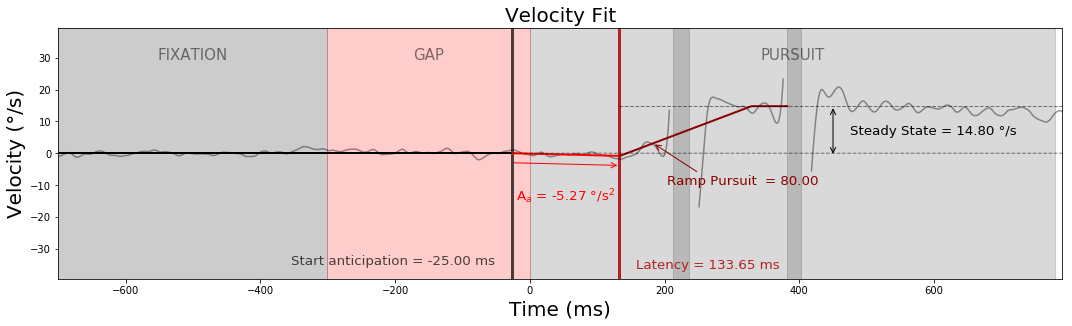

Filtre sur la position et la vitesse :


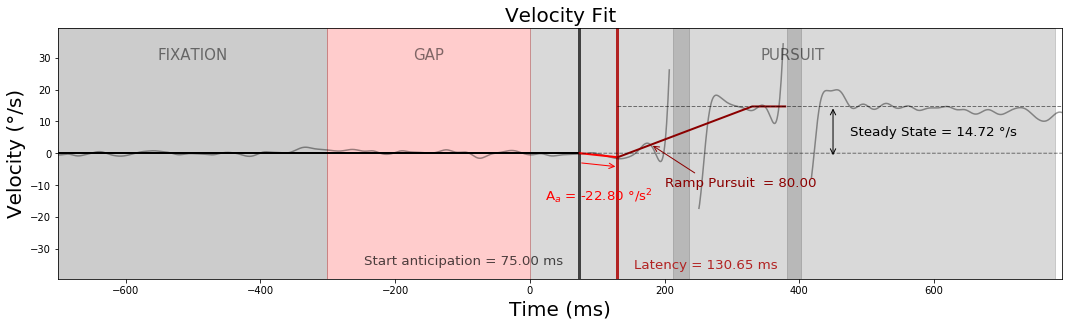


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/velocity
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_fct_velocity_line
param fit saved in result/param_Fit_fct_velocity_line_AM
------------------------------



In [8]:
demo('velocity', 'fct_velocity_line')

## Demo position

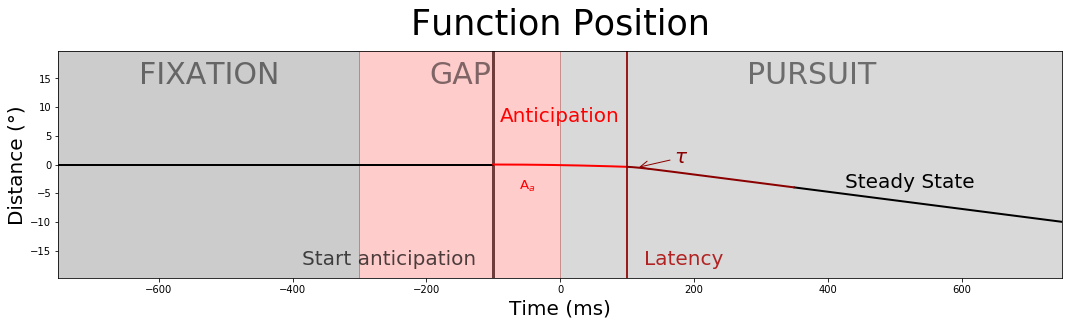

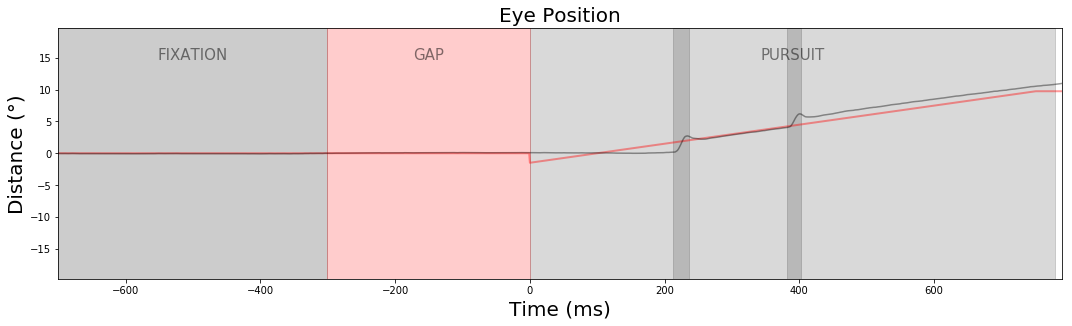

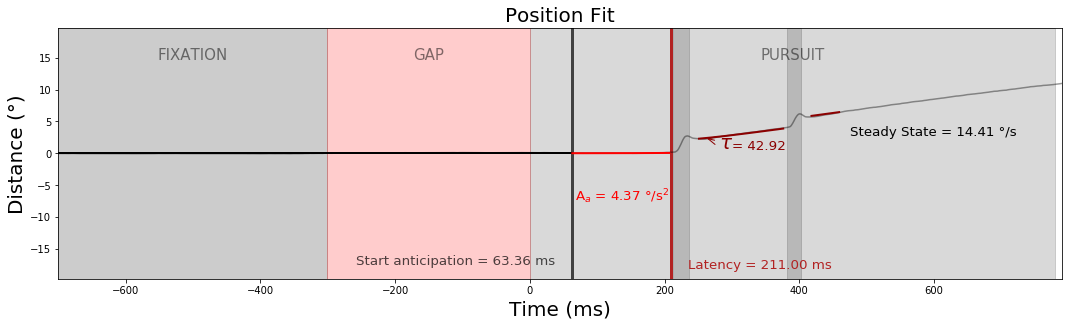

Filtre sur la position :


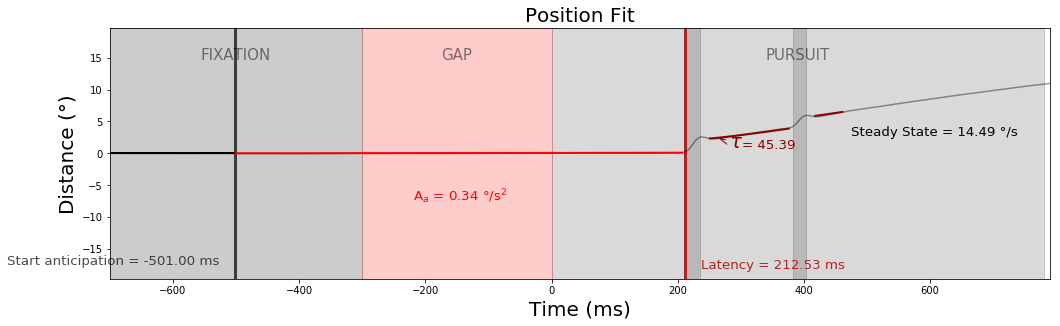


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/position
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_fct_position
param fit saved in result/param_Fit_fct_position_AM
------------------------------



In [9]:
demo('position', 'fct_position')

## Demo saccade

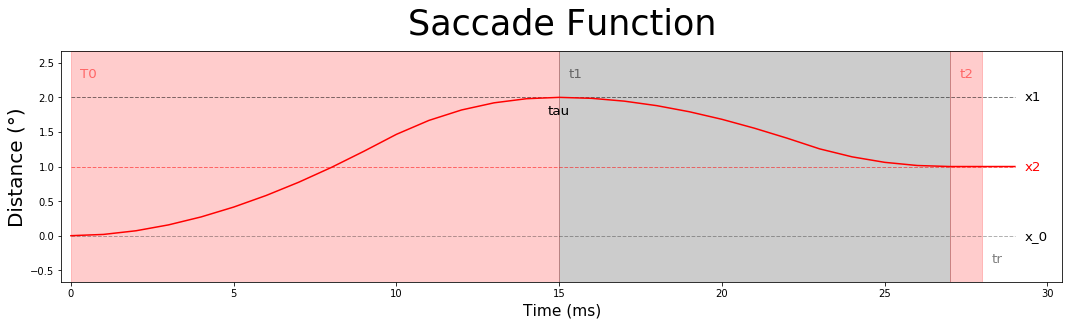

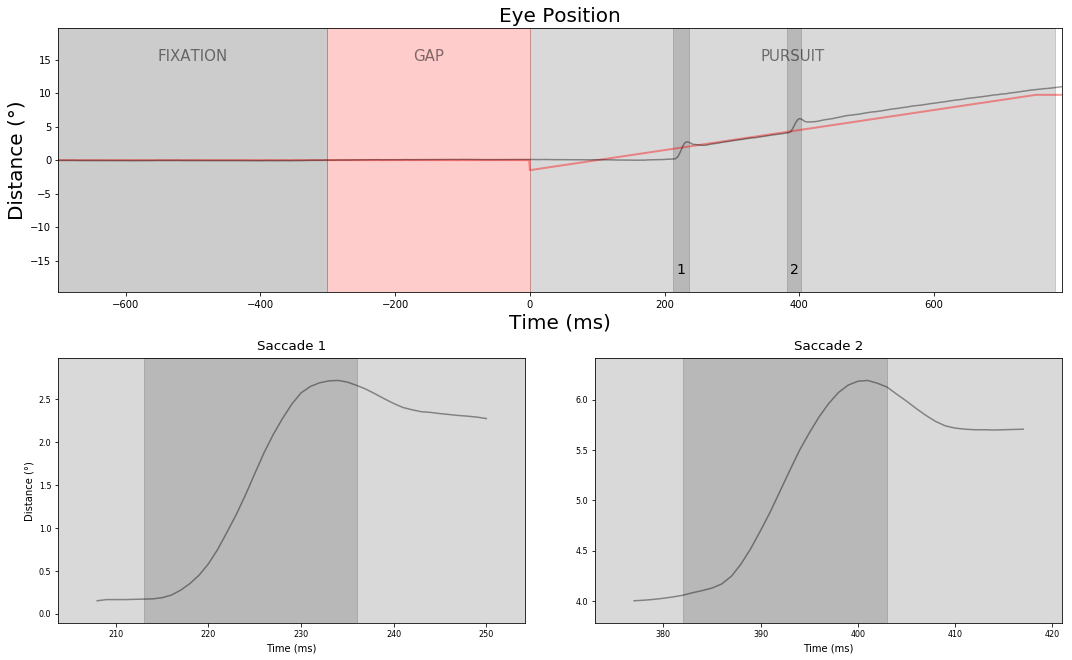

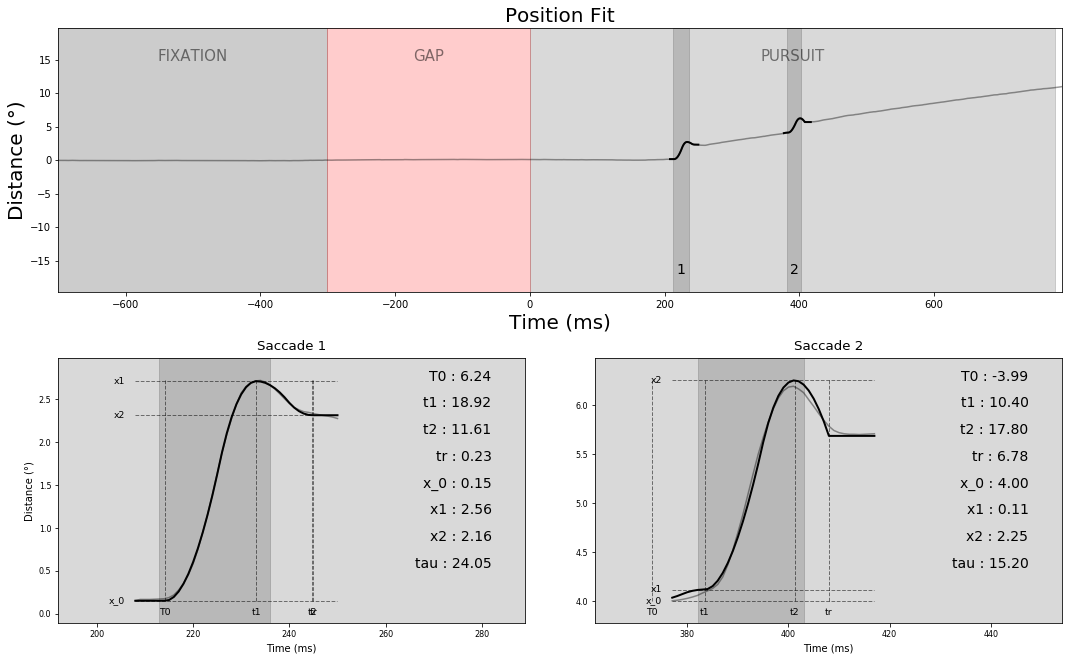

Filtre sur la position :


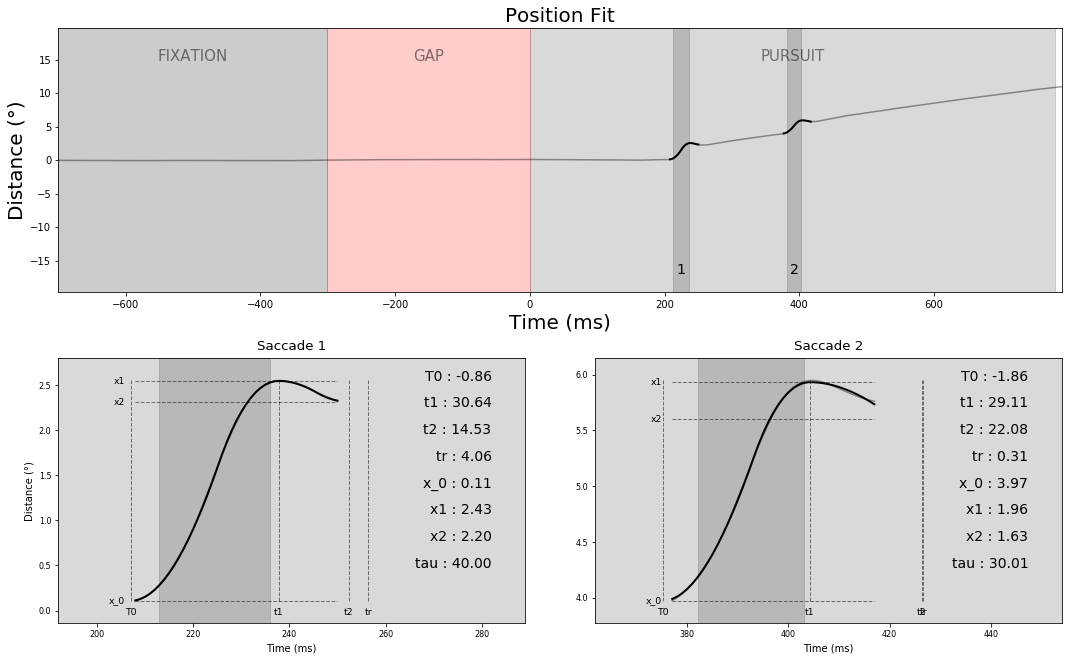


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/saccade
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_fct_saccade
param fit saved in result/param_Fit_fct_saccade_AM
------------------------------



In [10]:
demo('saccade', 'fct_saccade')

# Retrieving the parameters

In [11]:
def Retrieving_param(equation):
    with open('result/param_Fit_AM_%s.pkl'%equation, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
    
    print('\nParam recorded\n---------------\n')
    print(param.keys())
    
    print('\nFor the first trial\n---------------\n')
    for name in param.keys() :
        if name not in ['stop_search_misac', 'step_fit', 'N_trials', 'goodness_of_fit',
                        'do_whitening', 'cutoff', 'after_sacc', 'N_blocks', 'sample_rate',
                        'filt', 'before_sacc', 'time_sup', 'observer'] :
            print(name, '=', param[name][0][0])

In [12]:
Retrieving_param('fct_velocity')


Param recorded
---------------

dict_keys(['before_sacc', 'sample_rate', 'a_anti', 'filt', 'start_anti', 'old_steady_state', 'old_latency', 'steady_state', 'time_sup', 'goodness_of_fit', 'cutoff', 'after_sacc', 'latency', 'do_whitening', 'old_anti', 'N_trials', 'N_blocks', 'step_fit', 'observer', 'stop_search_misac', 'tau'])

For the first trial
---------------

a_anti = -5.2847262133153095
start_anti = 62.999827254661795
old_steady_state = 15.093442067421275
old_latency = nan
steady_state = 15.123116284533802
latency = 193.99857067152925
old_anti = -3.286044070072851
tau = 72.36010992070744


In [13]:
Retrieving_param('fct_velocity_sigmo')


Param recorded
---------------

dict_keys(['before_sacc', 'sample_rate', 'a_anti', 'filt', 'start_anti', 'old_steady_state', 'old_latency', 'steady_state', 'time_sup', 'goodness_of_fit', 'cutoff', 'after_sacc', 'latency', 'do_whitening', 'old_anti', 'ramp_pursuit', 'N_blocks', 'step_fit', 'observer', 'stop_search_misac', 'N_trials'])

For the first trial
---------------

a_anti = -1.2662349371884858
start_anti = -93.9949094824616
old_steady_state = 15.093442067421275
old_latency = nan
steady_state = 15.284527116554333
latency = 175.0030899274418
old_anti = -3.286044070072851
ramp_pursuit = 40.00000213652942


In [14]:
Retrieving_param('fct_velocity_line')


Param recorded
---------------

dict_keys(['before_sacc', 'sample_rate', 'a_anti', 'filt', 'start_anti', 'old_steady_state', 'old_latency', 'steady_state', 'time_sup', 'goodness_of_fit', 'cutoff', 'after_sacc', 'latency', 'do_whitening', 'old_anti', 'ramp_pursuit', 'N_blocks', 'step_fit', 'observer', 'stop_search_misac', 'N_trials'])

For the first trial
---------------

a_anti = -3.1538982039029264
start_anti = 62.999569763930594
old_steady_state = 15.093442067421275
old_latency = nan
steady_state = 15.180709209290834
latency = 158.99997260913528
old_anti = -3.286044070072851
ramp_pursuit = 69.21562648170408


In [15]:
Retrieving_param('fct_position')


Param recorded
---------------

dict_keys(['before_sacc', 'sample_rate', 'a_anti', 'filt', 'start_anti', 'old_steady_state', 'old_latency', 'steady_state', 'time_sup', 'goodness_of_fit', 'cutoff', 'after_sacc', 'latency', 'do_whitening', 'old_anti', 'N_trials', 'N_blocks', 'step_fit', 'observer', 'stop_search_misac', 'tau'])

For the first trial
---------------

a_anti = -0.8644737926407302
start_anti = -500.99999997782
old_steady_state = 15.093442067421275
old_latency = nan
steady_state = 14.207156277791155
latency = 214.999999996591
old_anti = -3.286044070072851
tau = 79.99999999586394


In [16]:
Retrieving_param('fct_saccade')


Param recorded
---------------

dict_keys(['before_sacc', 'sample_rate', 'T0', 'goodness_of_fit', 'filt', 'x1', 'x2', 'x_0', 'time_sup', 'cutoff', 'after_sacc', 't2', 'tr', 't1', 'N_trials', 'N_blocks', 'step_fit', 'observer', 'stop_search_misac', 'do_whitening', 'tau'])

For the first trial
---------------

T0 = [1.1802896405148928, 8.192986532151906, 6.250646971678023, 3.546714860064135]
x1 = [0.5511798880079333, -3.8108508303072934, -2.4743874061130833, -1.5283121111871951]
x2 = [0.26429867842356636, -2.4104404690906653, -1.5019277523822971, -0.9723104486959242]
x_0 = [-0.12880606816552265, -0.22160360416736463, -4.014450505605895, -10.217275704455709]
t2 = [11.070420107104905, 12.992243992733844, 10.012578595149208, 10.034011617461523]
tr = [4.389951441838846, 0.0038193190626487072, 1.1785212663955997, 2.8482170174241124]
t1 = [13.80368384554161, 19.34646634699066, 17.55825313325032, 17.57105648565289]
tau = [14.362669972043989, 27.15075127566345, 17.65312776832085, 5.494692034910